<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_221129.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chap 3. Keras**

---



## **6. 모델 저장 및 불러오기**

  - 예제 실습을 위해 mnist 데이터셋을 불러오고, 앞에서 사용한 신경망 모델을 활용하여 모델 훈련을 먼저 완료한다.

In [12]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')   # 레이블이 10개이므로, 노드는 10개가 되어야 함
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train,
          validation_data = (x_test, y_test),
          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2314 - accuracy: 0.9316 - val_loss: 0.1062 - val_accuracy: 0.9658
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0935 - accuracy: 0.9714 - val_loss: 0.0912 - val_accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0671 - accuracy: 0.9785 - val_loss: 0.0980 - val_accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0488 - accuracy: 0.9842 - val_loss: 0.0814 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0912 - val_accuracy: 0.9732
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0872 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.0740 - val_ac

### **6.1 모델을 파일로 저장**

  - `save()` 메소드를 활용하면 훈련을 종료하여 `가중치가 업데이트된 모델 인스턴스를 저장`할 수 있다.
    - 저장 형식은 `HDF5` 포맷과 `SavedModel` 포맷 두 가지이다.

In [14]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

### **6.2 저장된 모델 복원**

  - `tensorflow.keras.models.load_model()` 메소드로 `저장된 모델을 복원`할 수 있다.

In [15]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


  - 복원한 모델을 검증하여 복원이 잘 되었는지 확인한다.
  - 검증 셋을 evaluate 함수에 대입해, 손실 함수와 평가지표를 계산한다.

In [16]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose = 0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09826, acc: 0.97740


  - `.h5 확장자를 생략`하면 `SavedModel` 포맷으로 저장된다.
  - SavedModel 포맷으로 저장된 모델 역시 HDF5와 동알한 방식으로 복원 가능하다.

In [17]:
# 모델을 SavedModel 포맷으로 저장
model.save('saved-model')

In [18]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


  - HDF5 형식으로 저장 및 복원된 모델과 SavedModel 형식으로 저장 및 복원된 모델의 성능이 동일함을 확인할 수 있다.

In [19]:
# 모델 검증 (HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose = 0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose = 0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09826, acc: 0.97740
saved_model] loss: 0.09826, acc: 0.97740




---



## **7. 복잡한 모델 생성**

### **7.1 함수형 API (Functional API)**

  - 함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있다.
  - 여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게, Functional API는 복잡한 구조의 모델을 정의할 수 있다.
  - `Functional API`를 사용하면 함수의 입력 매개변수를 여러 개 갖는 `다중 입력`, 함수의 return 값을 여러 개 갖는 `다중 출력`, `같은 레벨에 여러 개의 층을 배치`하여 `입력과 출력을 공유`하는 구조도 가능하다.
  - 반면 Sequential API를 사용하면 단방향의 Sequential 모델만 구현할 수 있다는 제약이 있다.

  - 아래의 코드는 기존에 Sequential API로 구현한 MNIST 분류기 모델을 함수형 API로 동일하게 구현한 코드이다.

In [20]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')   # 레이블이 10개이므로, 노드는 10개가 되어야 함
])

  - 함수형 API를 사용하기 위해서는 먼저 Input 레이어를 정의한다. Input 레이어에는 데이터의 입력 shape을 정의한다.
  - 레이어마다 반환되는 출력 값을 변수에 저장한 뒤, 다음 레이어의 입력으로 연결한다.
  - 이렇게 여러 개의 레이어를 마치 체인 구조로 입출력을 계속 연결할 수 있다.

In [22]:
# Input 레이어 정의
input_layer = tf.keras.Input(shape = (28, 28), name = 'InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name = 'Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation = 'relu', name = 'Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation = 'relu', name = 'Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation = 'softmax', name = 'Outputlayer')(x3)

  - `name` 매개변수로 `각 레이어에 이름`을 부여할 수 있다.
  - `첫 Input 레이어`로 시작해 `x4` 변수는 `마지막 출력층`을 나타낸다.
  - 이렇게 체인 방식으로 연결한 후에 `tf.keras.Model()`에 `입력 레이어`와 `출력 레이어를 정의`해 모델을 생성한다.

In [23]:
# 모델 생성
func_model = tf.keras.Model(inputs = input_layer, outputs = x4, name = 'FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 Outputlayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


  - 위와 같이 `tf.keras.Model()`에 `inputs` 매개변수로 입력층인 `input_layer`를, `outputs` 매개변수에 출력층인 `x4`를 지정해 모델을 생성한다.

  - 지금까지는 `summary()`로 모델의 요약을 확인했으나, `복잡한 구조`를 갖는 모델을 생성할 경우 summary()로는 모델의 구조를 `시각화하기 어렵다`.
  - 케라스 유틸 패키지의 `plot_model` 모듈을 활용하여 `모델의 구조도를 시각화`해 보자.

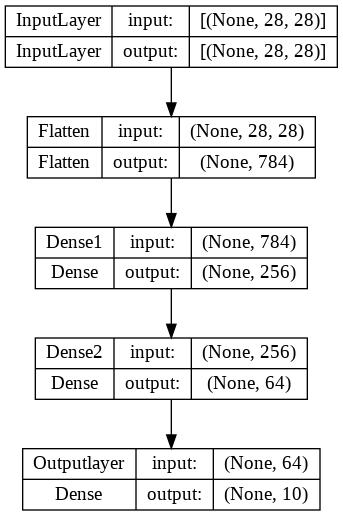

In [24]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes = True, show_layer_names = True, to_file = 'model.png')

  - `show_shape` : `데이터의 입출력 shape`을 출력
  - `show_layer_names` : `레이어의 이름` 출력

  - 함수형 API로 생성한 모델도 Sequential API와 동일하게 모델 훈련을 진행한다.
  - 생성된 모델 인스턴스에 compile() 메소드로 모델을 컴파일하고, fit() 메소드로 모델을 훈련한다. 훈련이 완료된 뒤 evaluate() 메소드로 검증할 수 있다.

In [25]:
# 컴파일
func_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs = 3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose = 0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2098 - accuracy: 0.9377
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0871 - accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0596 - accuracy: 0.9811
Functional Model] loss: 0.07664, acc: 0.97650


### **7.2 모델 서브클래싱 (Model Subclassing)**

  - `Model Subclassing`으로 모델 인스턴스를 생성하기 위해서는 `tf.keras.Model`을 상속받아 `생성하고자 하는 모델 클래스를 구현`한다.
  - 모델의 `__init__()` 함수에 `레이어를 정의`하고 레이어의 `하이퍼파라미터를 정의`한다.

In [27]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation = 'relu')
    self.dense2 = tf.keras.layers.Dense(64, activation = 'relu')
    self.dense3 = tf.keras.layers.Dense(10, activation = 'softmax')

  # method overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

  - `call()` 함수를 `메소드 오버라이딩`으로 구현한다.
    - call() 메소드는 `fit() 메소드가 호출되어 훈련`하는 경우 `호출될 함수`이다.
    - `call() 함수 내부`에서는 입력부터 출력까지의 흐름, 즉 `순전파를 정의`하고 함수형 API와 같은 방식으로 `모든 레이어를 체인처럼 연결`한다.
    - 마지막으로 `최종 출력 값을 return` 한다.

In [28]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape = (28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_16 (Dense)            multiple                  200960    
                                                                 
 dense_17 (Dense)            multiple                  16448     
                                                                 
 dense_18 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


  - 생성자로 객체를 생성해 저장한 mymodel 변수에 바로 summary()로 요약 출력하는 것은 불가능하다.
  - mymodel에 input 레이어와 함께 shape을 정의해주면 summary()로 모델의 요약을 확인할 수 있다.

In [29]:
# 컴파일
mymodel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs = 3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose = 0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2125 - accuracy: 0.9363
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0868 - accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0611 - accuracy: 0.9805
Subclassing Model] loss: 0.07662, acc: 0.97430


  - Model Subclassing과 함수형 API로 생성된 모델은 생성하는 방식에만 차이가 있을 뿐, 컴파일, 모델 훈련, 모델 검증 과정은 동일하다.

### **7.3 서브클래싱 모델 파라미터를 활용한 생성**

  - `Model Subclassing`으로 생성하는 `장점`은 `생성자 파라미터`로 `모델 내부 레이어의 하이퍼파라미터를 지정`할 수 있다는 점이다.
  - 다음은 모델의 생성자 파라미터를 추가하여 동적으로 레이어의 유닛 개수를 초기화하는 예제이다.

In [30]:
class MyModel(tf.keras.Model):

  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation = 'relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation = 'relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation = 'softmax')

  # class overiding
  # 훈련용 함수 정의
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

  - 모델의 `생성자 파라미터`로 기준이 되는 `unit의 개수`와 `레이블의 개수를 입력`받아 Dense 레이어의 유닛 개수를 계산하여 설정한다.

In [31]:
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape = (28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_19 (Dense)            multiple                  200960    
                                                                 
 dense_20 (Dense)            multiple                  16448     
                                                                 
 dense_21 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


  - 동적으로 설정한 레이어의 파라미터가 초기화되었음을 알 수 있다.

In [32]:
# 컴파일
mymodel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs = 3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose = 0)
print(f'Subclassing Model w. parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2130 - accuracy: 0.9380
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0872 - accuracy: 0.9734
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0597 - accuracy: 0.9813
Subclassing Model w. parameters] loss: 0.07081, acc: 0.97730


  - 이렇게 생성한 모델도 동일하게 compile() 메소드로 컴파일 한 뒤, fit() 메소드로 훈련한다.
  - 훈련이 완료된 뒤 모델 인스턴스의 evaluate() 메소드로 모델의 성능을 검증할 수 있다.